## 4. Data Analysis

### 4.1. Technical Analysis

In this section, I will attempt to predict stock price of apple with three machine learning techniques: Linear regression, ARIMA, KNN regression and LSTM. The explanatory variables are the technical indicators we have calculated in previous sections. I have used 70% of data for training and 30% for testing.

In [82]:
new_df_tech = df_tech_indic.dropna()
X = new_df_tech.iloc[:,8:]
y = new_df_tech.iloc[:,[4]]
date = new_df_tech.iloc[:,0]

Before analysis, we scale the data to fall between -1 and 1. Then split dataset into test and training set.

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler((0, 1)); scaler_y = MinMaxScaler((0, 1))
sX = scaler_x.fit_transform(X); sY = scaler_y.fit_transform(y)
#X_train, X_test, y_train, y_test = train_test_split(sX, sY, test_size=0.3, random_state=999)
#splitting into train and validation
X_train = sX[:1607]; X_test = sX[1607:]
y_train = sY[:1607]; y_test = sY[1607:]
date_train =date[:1607] ; date_test = date[1607:]

In [84]:
len(y_test)

690

#### 4.1-1. Linear Regression [not included in report. just to try]

Simple linear regression model

In [85]:
from sklearn.linear_model import LinearRegression
ls = LinearRegression()
ls.fit(X_train, y_train)
pred_train_ls = ls.predict(X_train)
pred_test_ls = ls.predict(X_test)

Lasso regression model

In [61]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()
lasso.fit(X_train, y_train)
pred_train_lasso = lasso.predict(X_train)
pred_test_lasso = lasso.predict(X_test)

C:\Users\Natalie Kim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Natalie Kim\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [63]:
pred_test_lasso_real = scaler_y.inverse_transform([pred_test_lasso])
pred_test_ls_real =scaler_y.inverse_transform(pred_test_ls)

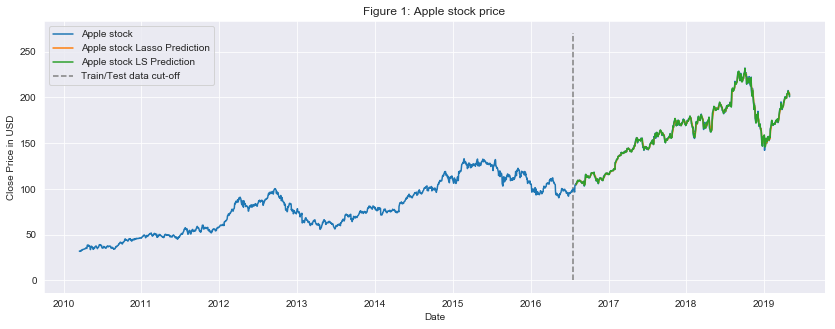

In [64]:
plt.figure(figsize=(14, 5))
plt.plot(date,y, label='Apple stock')
plt.plot(date_test.values,pred_test_lasso_real[0],label='Apple stock Lasso Prediction')
plt.plot(date_test.values,pred_test_ls_real,label='Apple stock LS Prediction')
plt.vlines(datetime.date(2016,7, 20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.title('Figure 1: Apple stock price')
plt.legend()
plt.show()

#### 4.1-2. ARIMA (Autoregressive Integrated Moving Average Model)

Plot ACF of time series

In [65]:
from pandas.tools.plotting import autocorrelation_plot

In [86]:
time_series = new_df_tech.loc[:,['Close*']]

C:\Users\Natalie Kim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


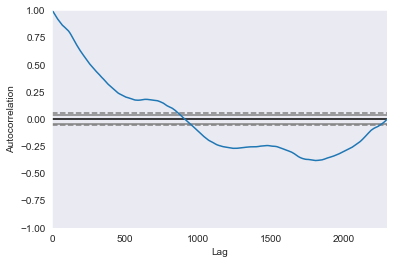

In [67]:
autocorrelation_plot(time_series)
plt.show()

In [87]:
new_time_series = new_df_tech.loc[:,['Date','Close*']]
new_time_series = new_time_series.set_index('Date')

Seasonality decompose --> No seasonality

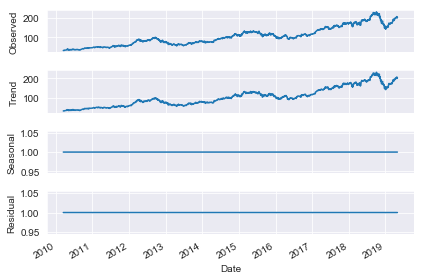

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
#code from:https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c
result = seasonal_decompose(new_time_series, model='multiplicative',freq=1)
result.plot()
plt.show()

Fit ARIMA model 

In [97]:
#Below code referenced from:
#***************************************************************************************
#*    Title: Using the latest advancements in AI to predict stock market movements
#*    Author: Boris Banushev
#*    Date:  14 JANUARY 2019
#*    Code version: N/A
#*    Availability: https://github.com/borisbanushev/stockpredictionai
#*
#***************************************************************************************/
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
#from pandas import datetime

series = new_time_series
X = series.values

train, test = X[0:1607], X[1607:len(X)]
history = [x for x in train]
pred_test_arima = []

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    pred_test_arima.append(yhat)
    obs = test[t]
    history.append(obs)

C:\Users\Natalie Kim\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Natalie Kim\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Natalie Kim\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be inte

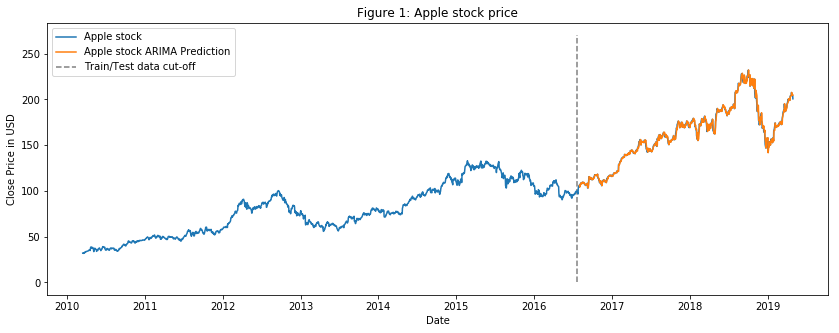

In [98]:
plt.figure(figsize=(14, 5))
plt.plot(date,y, label='Apple stock')
plt.plot(date_test.values,pred_test_arima,label='Apple stock ARIMA Prediction')
plt.vlines(datetime.date(2016,7, 20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.title('Figure 1: Apple stock price')
plt.legend()
plt.show()

#### 4.1-3. KNN Regression

In [90]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}
knn = neighbors.KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid = params, cv=5)
grid.fit(X_train, y_train)

C:\Users\Natalie Kim\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
knn_ = grid.best_estimator_
print(grid.best_params_)

{'n_neighbors': 6}


In [92]:
pred_test_knn = knn_.predict(X_test)
pred_train_knn = knn_.predict(X_train)

In [111]:
pred_test_knn_real =scaler_y.inverse_transform(pred_test_knn)
pred_train_knn_real =scaler_y.inverse_transform(pred_train_knn)

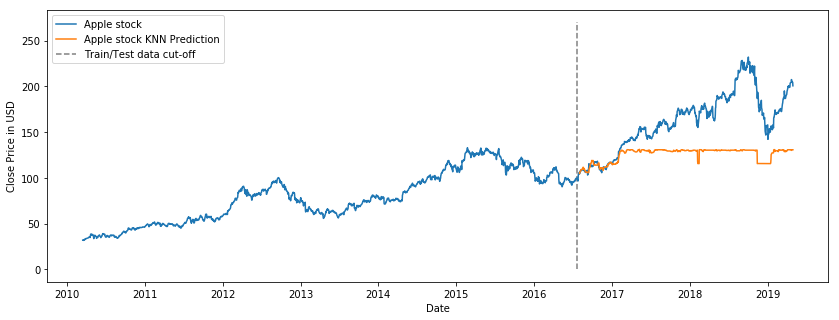

In [94]:
plt.figure(figsize=(14, 5))
plt.plot(date,y, label='Apple stock')
plt.plot(date_test.values,pred_test_knn_real,label='Apple stock KNN Prediction')
plt.vlines(datetime.date(2016,7, 20), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
#plt.title('Figure 1: Apple stock price')
plt.legend()
plt.show()

#### 4.1-3. LSTM

In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd

In [4]:
cd C:\Users\Natalie Kim\Documents\Python Scripts

C:\Users\Natalie Kim\Documents\Python Scripts


In [217]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y-%m-%d')

In [222]:
df_fund_combined = pd.read_csv('combined_Tech.txt',sep='\t')
df_fund_combined
df_fund_combined.drop(['Unnamed: 0'],axis=1,inplace = True)
df_fund_combined = df_fund_combined.dropna()
df_fund_combined.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume,Px change %,MA10,MA21,MA50,EWMA,26EWMA,12EWMA,MACD,20SD,UB,LB
49,2010-03-16,32.03,32.14,31.79,32.06,21.30,"111,727,000",0.002502,31.518,30.200952,29.5656,32.069578,30.408613,31.285933,0.877320,1.472590,33.146133,27.255772
50,2010-03-17,32.13,32.35,31.90,32.02,21.27,"112,739,200",-0.001248,31.730,30.341905,29.5946,32.044789,30.530379,31.398889,0.868510,1.488467,33.318838,27.364972
51,2010-03-18,32.01,32.14,31.80,32.09,21.32,"85,527,400",0.002186,31.929,30.491905,29.6238,32.067394,30.648057,31.505232,0.857174,1.493992,33.479888,27.503921
52,2010-03-19,32.11,32.18,31.60,31.75,21.09,"139,861,400",-0.010595,31.976,30.623333,29.6560,31.908697,30.731088,31.542894,0.811806,1.456175,33.535684,27.710983
53,2010-03-22,31.50,32.29,31.45,32.11,21.33,"114,104,900",0.011339,32.057,30.780476,29.6966,32.009349,30.834856,31.630151,0.795295,1.400915,33.582307,27.978645


In [43]:
df_fund_combined['Volume'] = [float(each.replace(',','')) for each in df_fund_combined['Volume']]

In [59]:
X = df_fund_combined.loc[:, df_fund_combined.columns != 'Date']
#X = X.loc[:, X.columns != 'Date']
y= df_fund_combined[['Close*']]

Feature Scaling

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler((0, 1)); scaler_y = MinMaxScaler((0, 1))
sX = scaler_x.fit_transform(X); sY = scaler_y.fit_transform(y)
train_X = sX[:1607]; test_X = sX[1607:]
train_y = sY[:1607]; test_y = sY[1607:]
sY[60]

array([0.02016773])

In [213]:
Date = df_fund_combined['Date']

Model fitting

In [66]:
# Creating a data structure with 60 timesteps and 1 output
import numpy as np
X_train = []
y_train = []
for i in range(60, 1607):
    X_train.append(sX[i-60:i, :])
    y_train.append(sY[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 17))

In [68]:
X_train.shape

(1547, 60, 17)

In [176]:
#Below codes referenced from:
#***************************************************************************************
#*    Title: Using a Keras Long Short-Term Memory (LSTM) Model to Predict Stock Prices
#*    Author: Derrick Mwiti
#*    Date:  November 2018
#*    Code version: N/A
#*    Availability: https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html
#*
#***************************************************************************************/
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 17)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1547/1547 [==============================] - 8s 5ms/step - loss: 0.0063
Epoch 2/100
1547/1547 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 3/100
1547/1547 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 4/100
1547/1547 [==============================] - 4s 3ms/step - loss: 0.0012
Epoch 5/100
1547/1547 [==============================] - 5s 3ms/step - loss: 0.0011
Epoch 6/100
1547/1547 [==============================] - 5s 3ms/step - loss: 0.0011
Epoch 7/100
1547/1547 [==============================] - 5s 3ms/step - loss: 0.0012
Epoch 8/100
1547/1547 [==============================] - 5s 3ms/step - loss: 0.0011
Epoch 9/100
1547/1547 [==============================] - 5s 3ms/step - loss: 9.4585e-04
Epoch 10/100
1547/1547 [==============================] - 5s 3ms/step - loss: 9.5682e-04
Epoch 11/100
1547/1547 [==============================] - 5s 3ms/step - loss: 9.0324e-04
Epoch 12/100
1547/1547 [==============================] - 5s 3

In [177]:
inputs = sX[(len(sX)-len(test_X)-60):]

In [178]:
inputs.shape

(750, 17)

In [179]:
#predicting values, using past 60 from the train data
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,:])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],17))
pred_price = regressor.predict(X_test)
pred_price = scaler_y.inverse_transform(pred_price)
real_price = scaler_y.inverse_transform(test_y)

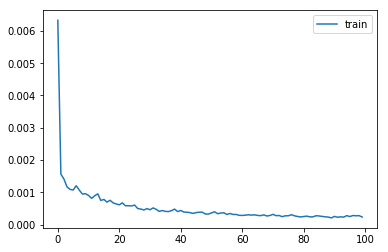

In [181]:
# plot loss of training 
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [210]:
pred_price.shape

(690, 1)

In [223]:
date = df_fund_combined['Date']
date_train =date[:1607] ; date_test = date[1607:]

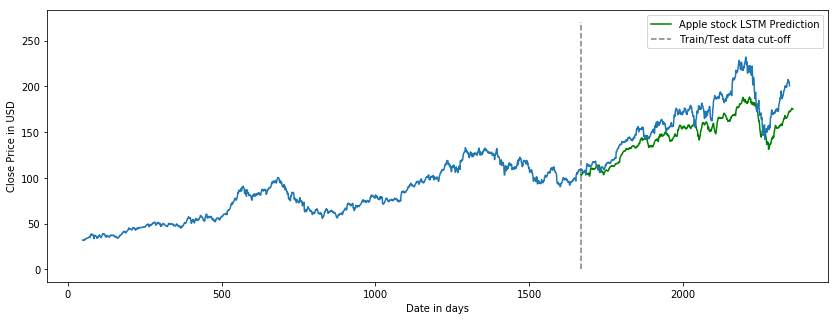

In [249]:
import datetime
plt.figure(figsize=(14, 5))
plt.plot(list(range(1547+120,(X.shape[0]+60))),pred_price, color = 'green', label = 'Apple stock LSTM Prediction')
plt.plot(y)
plt.vlines(1547+120, 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')

#plt.title('LSTM Stock Price Prediction')
plt.xlabel('Date in days')
plt.ylabel('Close Price in USD')
plt.legend()
plt.show()


### 4.2. Fundamental Analysis

In this section, I will try to evaluate publically available information (e.g. News) have impact on predicting future market movement. Target variable y is direction indicator of price move. (e.g. 1: price up or same, 0: price fell). As target variable is binary, we will use classification models in this section. I have used 70% of data for training and 30% for testing. Among 30% of testing, some part of data will be used as validation set to tune hyperparameters of the model by cross-validation.

Random prediction model: just random prediction

In [137]:
import random
import numpy as np 
random_predict = np.random.choice([0, 1], size=(len(df_fund),), p=[1./2, 1./2])

In [138]:
from sklearn.metrics import accuracy_score
print("The validation confusion matrix:")
print(confusion_matrix(df_fund['Direction'], random_predict))
print('Random model Accuracy: ', accuracy_score(random_predict, df_fund['Direction']))

The validation confusion matrix:
[[1837 1910]
 [2008 2012]]
Random model Accuracy:  0.49555813055233683


#### 4.2 - 1 Logistic Regression

In [117]:
X_train, X_test, y_train, y_test = train_test_split(lsa_factors, 
                                                  df_fund['Direction'], 
                                                  test_size = 0.3, random_state = 0)
#logistic regression with l1 penalty and c =0.1
lr = LogisticRegression(penalty='l1', C=0.10)
lr.fit(X_train, y_train)
print("Selected variables (non-zero coefficients):")
print(lr.coef_)

Selected variables (non-zero coefficients):
[[-0.05765931  0.          0.          0.10588416  0.10097826  0.08888692
   0.          0.15951469  0.        ]]


C:\Users\Natalie Kim\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score
pred_test_lr = lr.predict_proba(X_test)
print("The validation confusion matrix:")
print(confusion_matrix(y_test, np.argmax(pred_test_lr,1)))
print('LogisticRegression Accuracy: ', accuracy_score(np.argmax(pred_test_lr,1), y_test))

The validation confusion matrix:
[[  82 1063]
 [  82 1104]]
LogisticRegression Accuracy:  0.5087945087945088


#### 4.2-2. Support Vector Machine

In [119]:
# SVM classifier wtih gridsearchC, 5 fold CV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc = SVC(decision_function_shape = 'ovr', gamma='auto', random_state =8017)
grid = GridSearchCV(svc,
param_grid={'C': [0.01, 0.1, 1, 10],'kernel':('linear', 'rbf', 'poly')},cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=8017, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10], 'kernel': ('linear', 'rbf', 'poly')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [126]:
svm = grid.best_estimator_
print(grid.best_params_)

{'max_depth': 20, 'n_estimators': 60}


In [127]:
from sklearn.metrics import accuracy_score
pred_test_svm = svm.predict(X_test)
print("The validation confusion matrix:")
print(confusion_matrix(y_test, pred_test_svm))
acc_test_swm = accuracy_score(y_test, pred_test_svm)
print('SVM Accuracy: ',acc_test_swm)

The validation confusion matrix:
[[375 770]
 [334 852]]
SVM Accuracy:  0.5263835263835264


#### 4.2-3. Random Forest Classifer

In [120]:
# random forest classifier with grid search 5 fold CV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 999)

grid = GridSearchCV(rfc,
param_grid={'n_estimators': [10, 20, 30, 40, 50, 60], 'max_depth': [10, 20, 30, 40, 50, 60]},cv=5)
grid.fit(X_train, y_train)
rfc_ = grid.best_estimator_
print(grid.best_params_)

{'max_depth': 20, 'n_estimators': 60}


In [121]:
pred_test_rfc = rfc_.predict(X_test)
print("The validation confusion matrix:")
print(confusion_matrix(y_test, pred_test_rfc))
acc_test_rfc = accuracy_score(y_test, pred_test_rfc)
print('Random Forest Accuracy: ',acc_test_rfc)

The validation confusion matrix:
[[375 770]
 [334 852]]
Random Forest Accuracy:  0.5263835263835264


#### 4.2-4. XGboost Classifier

In [122]:
from xgboost import XGBClassifier
# fit model no training data
xgbc = XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [123]:
# make predictions for test data
y_pred = xgbc.predict(X_test)

In [124]:
pred_test_xgbc = xgbc.predict(X_test)
print("The validation confusion matrix:")
print(confusion_matrix(y_test, pred_test_xgbc))
acc_test_xgbc = accuracy_score(y_test, pred_test_xgbc)
print('XG boost Accuracy: ',acc_test_xgbc)

The validation confusion matrix:
[[277 868]
 [257 929]]
XG boost Accuracy:  0.5173745173745173


## 5. Performance Evaluation of Models

#### 5.1 Techinical Analysis

Regression performance metrics are mean squared errors and mean absolute error.

Linear / Lasso Regression

In [90]:
from sklearn.metrics import mean_squared_error
mse_train_ls = mean_squared_error(y_train, pred_train_ls)
mse_test_ls = mean_squared_error(y_test, pred_test_ls)

mse_train_lasso = mean_squared_error(y_train, pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso)


print("LS: Training MSE:", round(mse_train_ls, 5), "Testing MSE:", round(mse_test_ls, 5))
print("LASSO: Training MSE:", round(mse_train_lasso, 5), "Testing MSE:", round(mse_test_lasso, 5))


LS: Training MSE: 0.0 Testing MSE: 2e-05
LASSO: Training MSE: 1e-05 Testing MSE: 5e-05


In [91]:
from sklearn.metrics import mean_absolute_error

mae_train_ls = mean_absolute_error(y_train, pred_train_ls)
mae_test_ls = mean_absolute_error(y_test, pred_test_ls)

mae_train_lasso = mean_absolute_error(y_train, pred_train_lasso)
mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso)


print("LS: Training MAE:", round(mae_train_ls, 5), "Testing MAE:", round(mae_test_ls, 5))
print("LASSO: Training MAE:", round(mae_train_lasso, 5), "Testing MAE:", round(mae_test_lasso, 5))


LS: Training MAE: 0.00154 Testing MAE: 0.00293
LASSO: Training MAE: 0.00277 Testing MAE: 0.005


ARIMA 

In [101]:
arima_mae = mean_absolute_error(test, pred_test_arima)
arima_mse = mean_squared_error(test, pred_test_arima)
print('ARIMA: Testing MSE: %.3f' % arima_mse)
print('ARIMA: Testing MAE: %.3f' % arima_mae)

ARIMA: Testing MSE: 6.580
ARIMA: Testing MAE: 1.692


KNN Regression

In [81]:
import math
rmse_val = []
for K in [2,3,4,5,6,7,8,9,10]:
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  2 is: 0.22513679233750855
RMSE value for k=  3 is: 0.22535290888976195
RMSE value for k=  4 is: 0.22523832257574564
RMSE value for k=  5 is: 0.22523940953413762
RMSE value for k=  6 is: 0.22519158252323312
RMSE value for k=  7 is: 0.22523683865065866
RMSE value for k=  8 is: 0.22534879110928074
RMSE value for k=  9 is: 0.22538620294228273
RMSE value for k=  10 is: 0.22544017424737026


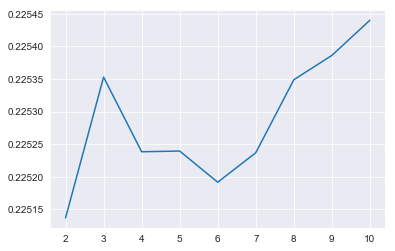

In [82]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
plt.plot([2,3,4,5,6,7,8,9,10],curve)

In [113]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae_train_knn = mean_absolute_error(X[:1607], pred_train_knn_real)
mae_test_knn = mean_absolute_error(X[1607:], pred_test_knn_real)

mse_train_knn = mean_squared_error(X[:1607], pred_train_knn_real)
mse_test_knn = mean_squared_error(X[1607:], pred_test_knn_real)


print("KNN: Training MAE:", round(mae_train_knn, 5), "Testing MAE:", round(mae_test_knn, 5))
print("KNN: Training MSE:", round(mse_train_knn, 5), "Testing MSE:", round(mse_test_knn, 5))


KNN: Training MAE: 0.79991 Testing MAE: 36.38665
KNN: Training MSE: 1.30406 Testing MSE: 2034.94619


LSTM 

In [248]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae_test_lstm = mean_absolute_error(y[1607:], pred_price)
mse_test_lstm = mean_squared_error(y[1607:], pred_price)

print("LSTM:Testing MAE:", round(mae_test_lstm, 5))
print("LSTM:Testing MSE:", round(mse_test_lstm, 5))

LSTM:Testing MAE: 15.84327
LSTM:Testing MSE: 353.15512


In [114]:
testing_MSE = [arima_mse,round(mse_test_knn, 5),353.15512]
testing_MAE = [arima_mae,round(mae_test_knn, 5), 15.84327]
data_error = [testing_MSE,testing_MAE]

In [115]:
pd.DataFrame(data_error,index=['Mean Squared Error','Mean Absolute Error'],columns=['ARIMA','KNN','LSTM'])

,ARIMA,KNN,LSTM
Mean Squared Error,6.580053,2034.94619,353.15512
Mean Absolute Error,1.692172,36.38665,15.84327


#### 5.2 Fundamental Analysis

For classification techinique, accuracy score along with F-score, precisio and recall are used.

In [143]:
pd.DataFrame([['TP','FN'],['FP','TN']],index=['1 (True)','0 (True)'],columns=['1 (Predicted)','0 (Predicted)'])

,1 (Predicted),0 (Predicted)
1 (True),TP,FN
0 (True),FP,TN


Accuracy score

In [140]:
Accuracy = [accuracy_score(random_predict, df_fund['Direction']),accuracy_score(np.argmax(pred_test_lr,1), y_test),accuracy_score(y_test, pred_test_svm), accuracy_score(y_test, pred_test_rfc),accuracy_score(y_test, pred_test_xgbc)]

In [141]:
pd.DataFrame([Accuracy],index=['Accuracy Score'],columns=['Random Assignment','Logistic Regression', 'Support Vector Machine','Random Forest','XGboost Classifier'])

,Random Assignment,Logistic Regression,Support Vector Machine,Random Forest,XGboost Classifier
Accuracy Score,0.495558,0.508795,0.526384,0.526384,0.517375


In [142]:
(0.508795+0.526384+0.526384+0.517375)/4

0.5197345

Classification precision, recall, F1 score

In [135]:
from sklearn.metrics import classification_report

print("Logistic regression testing:\n",classification_report(y_test, np.argmax(pred_test_lr,1)))
#print('LogisticRegression Accuracy: ', accuracy_score(np.argmax(pred_test_lr,1), y_test))
print("Support Vector Machine testing:\n",classification_report(y_test, pred_test_svm))
#acc_test_swm = accuracy_score(y_test, pred_test_svm)
#print('SVM Accuracy: ',acc_test_swm)
print("Random Forest testing:\n",classification_report(y_test, pred_test_rfc))
#acc_test_rfc = accuracy_score(y_test, pred_test_rfc)
#print('Random Forest Accuracy: ',acc_test_rfc)
#acc_test_xgbc = accuracy_score(y_test, pred_test_xgbc)
#print('XG boost Accuracy: ',acc_test_xgbc)
print("XGboost Classifier testing:\n",classification_report(y_test, pred_test_xgbc))

Logistic regression testing:
               precision    recall  f1-score   support

           0       0.50      0.07      0.13      1145
           1       0.51      0.93      0.66      1186

   micro avg       0.51      0.51      0.51      2331
   macro avg       0.50      0.50      0.39      2331
weighted avg       0.50      0.51      0.40      2331

Support Vector Machine testing:
               precision    recall  f1-score   support

           0       0.53      0.33      0.40      1145
           1       0.53      0.72      0.61      1186

   micro avg       0.53      0.53      0.53      2331
   macro avg       0.53      0.52      0.51      2331
weighted avg       0.53      0.53      0.51      2331

Random Forest testing:
               precision    recall  f1-score   support

           0       0.53      0.33      0.40      1145
           1       0.53      0.72      0.61      1186

   micro avg       0.53      0.53      0.53      2331
   macro avg       0.53      0.52      0.